___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[5].shape#RGB değerler 1 channellı, diğerleri tek

(28, 28)

In [5]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

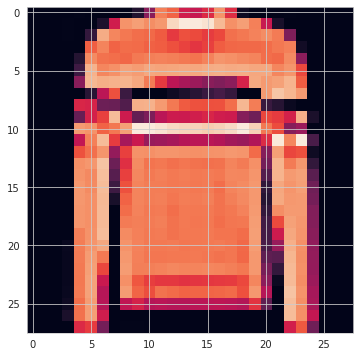

In [6]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [20]:
y_train[5]

2

In [21]:
y_train.shape

(60000,)

In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [24]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [35]:
y_train[0]

9

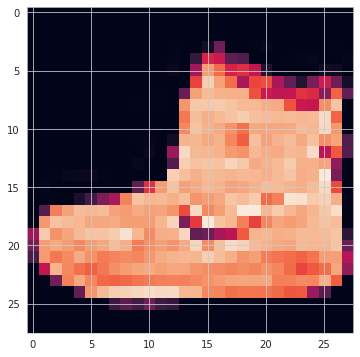

In [36]:
plt.imshow(X_train[0])#,cmap=plt.cm.binary)

In [37]:
classes[y_train[0]]

'Ankle boot'

In [38]:
X_train[y_train==1][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  53, 146, 127, 115,
        111, 130, 129, 100, 147, 169, 190,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 117, 190, 188, 221,
        234, 254, 236, 221, 205, 186, 222,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 127, 156, 175, 193,
        195, 195, 202, 203, 187, 168, 228,  32,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 186, 198, 209,
        219, 198, 205, 211, 201, 189, 233,  94,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 185, 199, 210, 225,
        207, 201, 207, 221, 210, 208, 236, 111,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 200, 175, 172, 215,
        224, 216, 216, 223, 210, 198, 237, 152,   0,   0,   0,   0,   0,
          0,   0],
       [  

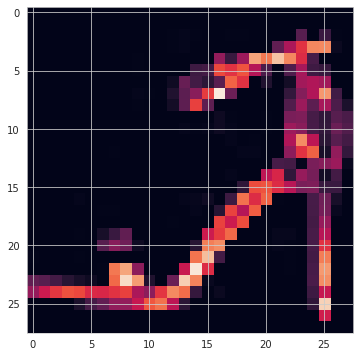

In [43]:
plt.imshow(X_train[y_train==5][0])

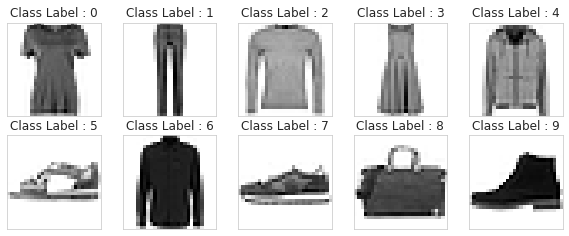

In [44]:
plt.figure(figsize=(10,10))
for i in range(0,10): 
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[y_train == i][3],cmap=plt.cm.binary)
  plt.title(f"Class Label : {i}")
  plt.tight_layout


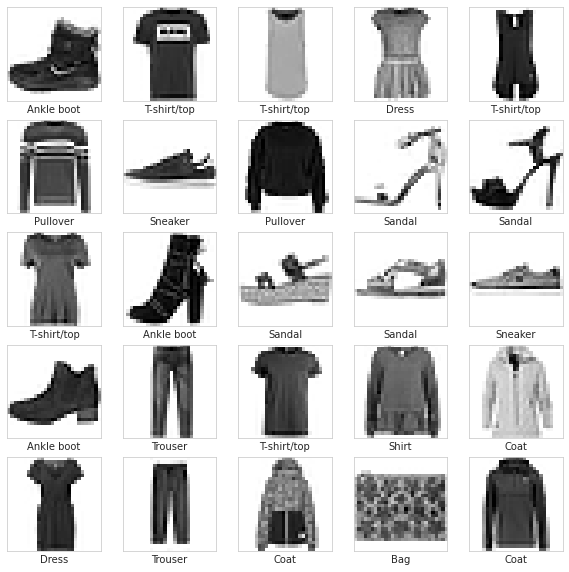

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i] / 255.0, cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [46]:
X_train[5].min()

0

In [47]:
X_train[5].max()

255

In [48]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [49]:
X_train[5].min()

0.0

In [50]:
X_train[5].max()

1.0

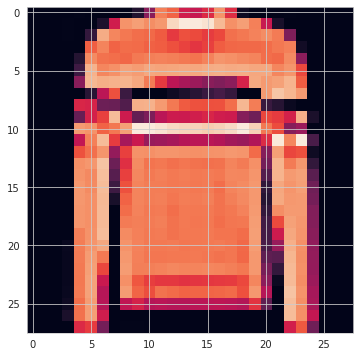

In [51]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [52]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [53]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [54]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [55]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [56]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [57]:

from tensorflow.keras.utils import to_categorical

In [58]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [59]:
y_train[0]

9

In [60]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [62]:
img_shape=X_train[0].shape

In [63]:
img_shape

(28, 28, 1)

In [66]:
model1 = Sequential()

model1.add(Conv2D(filters=28, kernel_size=(5,5), input_shape=img_shape, activation='relu')) 
model1.add(MaxPool2D(pool_size=(2, 2),strides=(1,1))) 

model1.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=img_shape, activation='relu')) 
model1.add(MaxPool2D(pool_size=(2, 2),strides=(1,1))) 

model1.add(Conv2D(filters=28 ,kernel_size=(2,2), input_shape=img_shape, activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))

model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [67]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 28)        728       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 28)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 64)        28736     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 19, 19, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 28)        7196      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 28)      

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights = True)

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [70]:
%%time
model1.fit(
    X_train, Y_train, 
    epochs=50,
    batch_size=32,  
    validation_data=(X_test,Y_test),
    callbacks=[early_stop]
)

Epoch 1/50
1875/1875 [==============================] - 241s 128ms/step - loss: 0.4389 - accuracy: 0.8406 - val_loss: 0.3773 - val_accuracy: 0.8699
Epoch 2/50
1875/1875 [==============================] - 238s 127ms/step - loss: 0.3086 - accuracy: 0.8903 - val_loss: 0.3331 - val_accuracy: 0.8879
Epoch 3/50
1875/1875 [==============================] - 238s 127ms/step - loss: 0.2869 - accuracy: 0.8983 - val_loss: 0.2912 - val_accuracy: 0.8948
Epoch 4/50
1875/1875 [==============================] - 239s 127ms/step - loss: 0.2776 - accuracy: 0.9031 - val_loss: 0.3499 - val_accuracy: 0.8838
Epoch 5/50
1875/1875 [==============================] - 253s 135ms/step - loss: 0.2727 - accuracy: 0.9066 - val_loss: 0.3260 - val_accuracy: 0.8823
Epoch 6/50
1875/1875 [==============================] - 238s 127ms/step - loss: 0.2671 - accuracy: 0.9088 - val_loss: 0.4194 - val_accuracy: 0.8826
Epoch 7/50
1875/1875 [==============================] - 247s 132ms/step - loss: 0.2680 - accuracy: 0.9104 - val_

In [71]:
# save model permanently and check
model1.save('/content/drive/MyDrive/fashion_mnist1.h5')

In [72]:
model1.metrics_names

['loss', 'accuracy']

In [73]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.439,0.841,0.377,0.870
1,0.309,0.890,0.333,0.888
2,0.287,0.898,0.291,0.895
3,0.278,0.903,0.350,0.884
4,0.273,0.907,0.326,0.882


**TASK 7: Plot values of metrics you used in your model.**

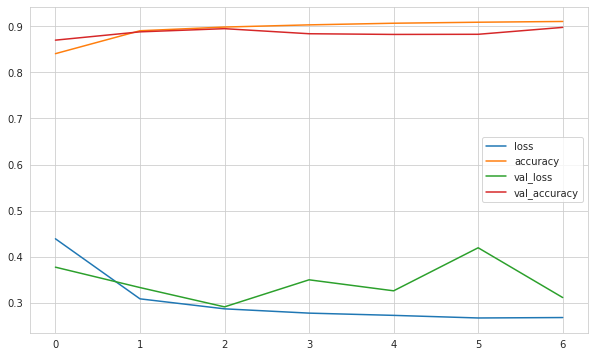

In [74]:
summary.plot();

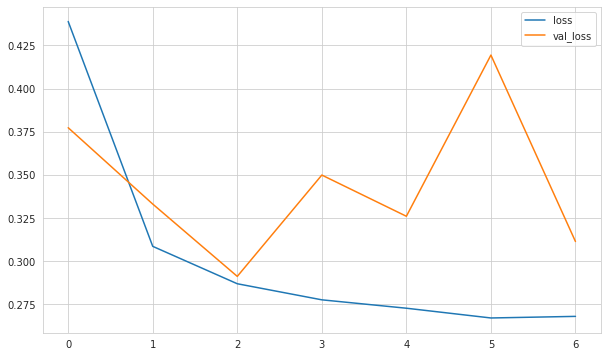

In [75]:
summary[["loss", "val_loss"]].plot();

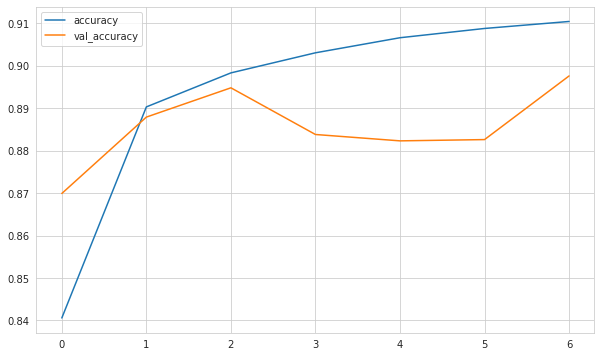

In [76]:
summary[["accuracy", "val_accuracy"]].plot();

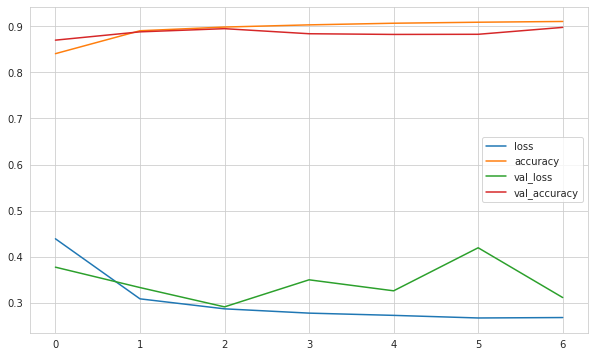

In [77]:
summary.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [78]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [79]:
model1.evaluate(X_test,Y_test)

313/313 [==============================] - 9s 28ms/step - loss: 0.2912 - accuracy: 0.8948


[0.2911505103111267, 0.8948000073432922]

In [80]:
score = model1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2911505103111267
Test accuracy: 0.8948000073432922


In [81]:
pred_prob = model1.predict(X_test)
pred_prob

array([[2.7266382e-11, 1.9700860e-13, 3.1078008e-11, ..., 4.7922437e-04,
        2.9671808e-08, 9.9951410e-01],
       [1.1940304e-05, 2.4212698e-11, 9.9923861e-01, ..., 5.3501696e-09,
        1.1255528e-07, 1.3002122e-10],
       [1.8496773e-07, 9.9999774e-01, 2.3683353e-09, ..., 8.6934911e-11,
        1.3923416e-07, 9.2963176e-10],
       ...,
       [5.4860352e-11, 8.5966973e-16, 2.9003306e-12, ..., 5.0689738e-15,
        1.0000000e+00, 1.3578705e-19],
       [3.2230039e-07, 9.9997878e-01, 6.3421822e-08, ..., 3.0432094e-08,
        3.8988031e-08, 8.6931401e-08],
       [4.7637769e-03, 1.6853561e-05, 6.0840067e-04, ..., 2.3891996e-01,
        1.2102606e-01, 9.0486938e-03]], dtype=float32)

In [82]:
pred_prob.shape

(10000, 10)

In [83]:
pred_prob[0]

array([2.7266382e-11, 1.9700860e-13, 3.1078008e-11, 5.3811529e-13,
       2.4810133e-11, 6.7223941e-06, 1.5242415e-09, 4.7922437e-04,
       2.9671808e-08, 9.9951410e-01], dtype=float32)

In [84]:
np.argmax(pred_prob[0])

9

In [85]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [86]:
y_pred.shape

(10000,)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.85      0.84      0.84      1000
           3       0.88      0.94      0.91      1000
           4       0.86      0.78      0.82      1000
           5       0.99      0.94      0.97      1000
           6       0.68      0.73      0.71      1000
           7       0.91      0.99      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.89      0.90     10000



In [88]:
print(confusion_matrix(y_test, y_pred))

[[848   0  10  23   3   1 103   0  12   0]
 [  0 973   0  16   2   0   5   0   4   0]
 [ 16   0 836   9  55   0  83   0   1   0]
 [ 11   1   9 937  13   0  26   0   3   0]
 [  1   0  56  44 783   0 115   0   1   0]
 [  1   0   0   0   0 945   0  36   6  12]
 [106   0  69  30  51   0 732   0  12   0]
 [  0   0   0   0   0   6   0 986   1   7]
 [  1   0   7   3   2   1   8   3 974   1]
 [  0   0   0   0   0   4   1  61   0 934]]


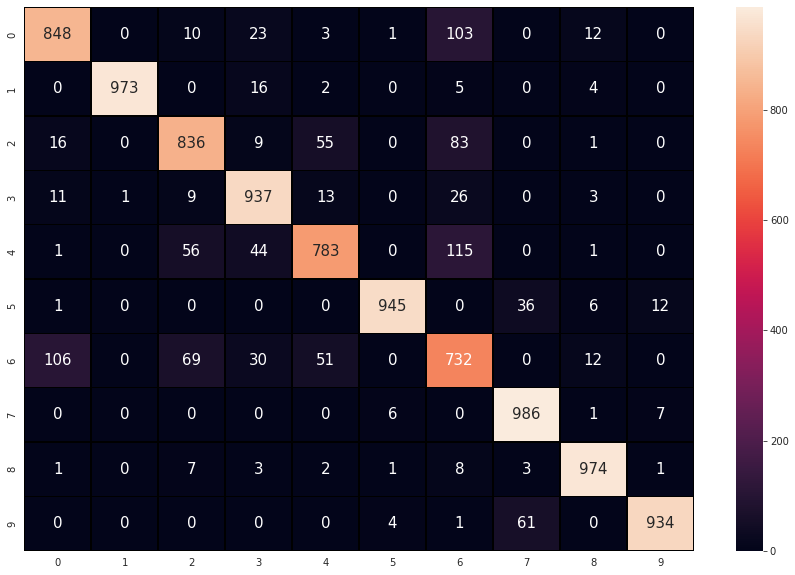

In [89]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [90]:
(y_test != y_pred).sum()

1052

## Prediction

In [91]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [93]:
model=load_model('/content/drive/MyDrive/fashion_mnist1.h5')

In [94]:
X_test[88].shape

(28, 28, 1)

In [96]:
np.expand_dims(X_test[88],axis=0).shape

(1, 28, 28, 1)

In [97]:
pred=model.predict(np.expand_dims(X_test[88],axis=0))

In [98]:
np.argmax(pred)

0

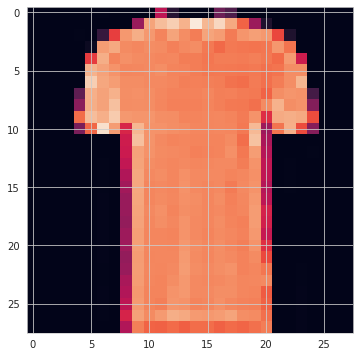

In [101]:
plt.imshow(X_test[88].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___